In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import sys
sys.path.append('/home/chenani/ownCloud/Workspaces/Eclipse/dataAnalysis/Sleep-current/src/')

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import cPickle as pkl
import statsmodels.api as sm
from signale.tools import locate
import signale
from os import path

/home/chenani/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/home/chenani/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
sns.set_style('white')
sns.set_context("poster",font_scale=1.7)
leftRight = sns.color_palette(['#f9ba32','#426e86'])
dgc = sns.color_palette(['#0f1f38','#c5001A','#1b45ba'])
sns.palplot(dgc)
#lrC = sns.xkcd_palette(leftRight)

In [149]:
awCont = pd.DataFrame([],columns=[u'ti', u'tf', u'tp', u'tSub', u'lSub', u'rSub', u'Lcorr', u'Rcorr',u'Lpv', u'Rpv', u'animal_ID'])
for item in locate('awakeReplays-*RO.db','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/'):
    dbPth = path.join(item[0],item[1])
    awro = pd.read_pickle(dbPth)
    awCont = awCont.append(awro[(awro.lSub>4)|(awro.rSub>4)],ignore_index=True)   

1692 1696


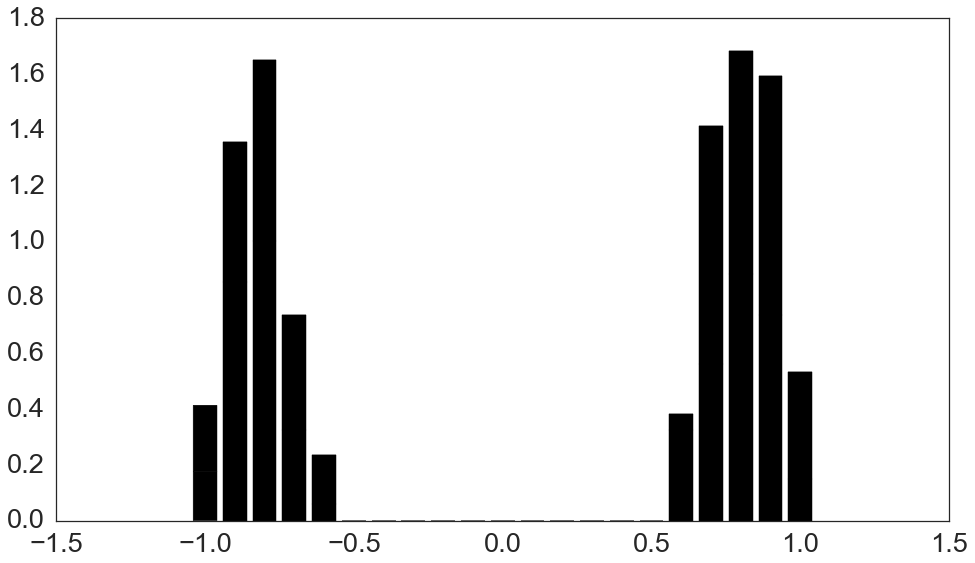

In [150]:
f,ax = pl.subplots(1,1,figsize=[16,9])
corrBins = np.arange(-1.05,1.06,0.1)
binCenters = (corrBins+0.05)[:-1]
print np.isfinite(awCont.Lcorr).sum(),np.isfinite(awCont.Rcorr).sum()
RRL = awCont[np.isfinite(awCont.Lcorr)&(awCont.lSub>5)]
RRR = awCont[np.isfinite(awCont.Rcorr)&(awCont.rSub>500)]
RRRn = RRR[(RRR.Lpv>0.1)]#&(RRL.Rpv>0.1)]
RRLn = RRL[(RRL.Lpv>0.1)]#&(RRL.Rpv>0.1)]
RRLs = awCont[(awCont.Lpv<0.1)]#|(RRO.Rpv<0.1)]
RRRs = awCont[(awCont.Rpv<0.1)]#|(RRR.Rpv<0.1)]
hst,bbb = np.histogram(RRLn.Lcorr,corrBins)
hst2,bbb = np.histogram(RRRn.Rcorr,corrBins)
hstm = (hst+hst2)/2.0
############PLOTS
#ax.bar(binCenters,hstm,0.08, color='#2eeeee');
#ax.bar(binCenters,np.histogram(RRRs.Rcorr,corrBins)[0],0.08,bottom=hstm, color='#d6e728');
#ax.set_xlim(-1.06,1.1)
pl.hist([RRLs.Lcorr,RRRs.Rcorr,RRRn.Rcorr],corrBins,color=['k','k','b'],stacked=True,normed=True);

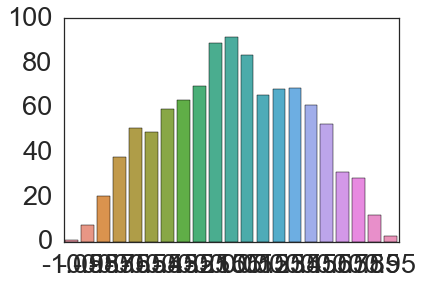

In [96]:
sns.barplot(corrBins[:-1],(hst+hst2)/2.0)

In [106]:
binCenters

array([ -1.00000000e+00,  -9.00000000e-01,  -8.00000000e-01,
        -7.00000000e-01,  -6.00000000e-01,  -5.00000000e-01,
        -4.00000000e-01,  -3.00000000e-01,  -2.00000000e-01,
        -1.00000000e-01,  -2.63677968e-16,   1.00000000e-01,
         2.00000000e-01,   3.00000000e-01,   4.00000000e-01,
         5.00000000e-01,   6.00000000e-01,   7.00000000e-01,
         8.00000000e-01,   9.00000000e-01,   1.00000000e+00])

In [154]:
#awCont = pd.DataFrame([],columns=[u'ti', u'tf', u'tp', u'tSub', u'lSub', u'rSub', u'Lcorr', u'Rcorr',u'Lpv', u'Rpv', u'animal_ID'])
for item in locate('*roDB*.db','/home/chenani/ownCloud/IpythonNotebooks/Sleep/MEC_Lesion_Project/control/'):
    dbPth = path.join(item[0],item[1])
    awro = pd.read_pickle(dbPth)
    awCont = awCont.append(awro[(awro.lSub>4)|(awro.rSub>4)],ignore_index=True)   

In [157]:
awro[awro.tSub>10]

,t_start,t_end,peak_value,t_peak,Lcorr,Rcorr,Lpv,Rpv,tSub,lSub,rSub,epoch,date,session,animal
871,5276.569172,5276.823172,0.005188,5276.706172,0.885714,0.571429,0.04,1.00,11.0,6.0,8.0,sws,Day1,sleep02,Rat616Control
1297,5914.375172,5914.630172,0.005794,5914.559172,0.714286,0.811189,0.04,0.04,14.0,8.0,12.0,sws,Day1,sleep02,Rat616Control
1667,6617.487172,6617.626172,0.006204,6617.574172,0.657143,0.523810,1.00,1.00,11.0,6.0,8.0,sws,Day1,sleep02,Rat616Control
1810,6830.085172,6830.262172,0.006422,6830.176172,0.142857,0.616667,1.00,1.00,11.0,7.0,9.0,sws,Day1,sleep02,Rat616Control
